<a href="https://colab.research.google.com/github/arthurflor23/handwritten-text-recognition/blob/master/src/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/arthurflor23/handwritten-text-recognition/blob/master/doc/image/header.png?raw=true" />

# Handwritten Text Recognition using TensorFlow 2.0

This tutorial shows how you can use the project [Handwritten Text Recognition](https://github.com/arthurflor23/handwritten-text-recognition) in your Google Colab.



## 1 Localhost Environment

We'll make sure you have the project in your Google Drive with the datasets in HDF5. If you already have structured files in the cloud, skip this step.

### 1.1 Datasets

The datasets that you can use:

a. [Bentham](http://transcriptorium.eu/datasets/bentham-collection/)

b. [IAM](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database)

c. [Rimes](http://www.a2ialab.com/doku.php?id=rimes_database:start)

d. [Saint Gall](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/saint-gall-database)

e. [Washington](http://www.fki.inf.unibe.ch/databases/iam-historical-document-database/washington-database)

### 1.2 Raw folder

On localhost, download the code project from GitHub and extract the chosen dataset (or all if you prefer) in the **raw** folder. Don't change anything of the structure of the dataset, since the scripts were made from the **original structure** of them. Your project directory will be like this:

```
.
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

After that, create virtual environment and install the dependencies with python 3 and pip:

> ```python -m venv .venv && source .venv/bin/activate```

> ```pip install -r requirements.txt```

### 1.3 HDF5 files

Now, you'll run the *transform* function from **main.py**. For this, execute on **src** folder:

> ```python main.py --source=<DATASET_NAME> --transform```

Your data will be preprocess and encode, creating and saving in the **data** folder. Now your project directory will be like this:


```
.
├── data
│   ├── bentham.hdf5
│   ├── iam.hdf5
│   ├── rimes.hdf5
│   ├── saintgall.hdf5
│   └── washington.hdf5
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

Then upload the **data** and **src** folders in the same directory in your Google Drive.

## 2 Google Drive Environment


### 2.1 TensorFlow 2.0

Make sure the jupyter notebook is using GPU mode.

In [1]:
!nvidia-smi

Wed Feb  5 20:06:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    38W / 250W |    579MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Now, we'll install TensorFlow 2.0 with GPU support.

In [2]:
# !pip install -q tensorflow-gpu==2.1.0-rc2

In [3]:
import tensorflow as tf

print('Tensorflow Version: {}\n'.format(tf.version.VERSION))

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print('Found GPU at: {}'.format(device_name))

Tensorflow Version: 2.0.0

Found GPU at: /device:GPU:0


### 2.2 Google Drive

Mount your Google Drive partition.

**Note:** *\"Colab Notebooks/handwritten-text-recognition/src/\"* was the directory where you put the project folders, specifically the **src** folder.

In [4]:
# from google.colab import drive

# drive.mount("./gdrive", force_remount=True)

# %cd "./gdrive/My Drive/Colab Notebooks/handwritten-text-recognition/src/"
# !ls -l
import h5py
# filename = '../data/bentham.hdf5'

# with h5py.File(filename, 'r') as f:
#     # List all groups
#     print("Keys: %s" % f.keys())
#     a_group_key = list(f.keys())[0]

#     # Get the data
#     data = list(f[a_group_key])
    
#     print(f['train']['dt'][5])
#     print(f['train']['gt'][5])

After mount, you can see the list os files in the project folder.

## 3 Set Python Classes

### 3.1 Environment

First, let's define our environment variables.

Set the main configuration parameters, like input size, batch size, number of epochs and list of characters. This make compatible with **main.py** and jupyter notebook:

* **dataset**: "bentham", "iam", "rimes", "saintgall", "washington"

* **arch**: network to run: "bluche", "puigcerver", "flor"

* **epochs**: number of epochs

* **batch_size**: number size of the batch

In [5]:
import os
import datetime
import string

# define parameters
source = "hw-text"
arch = "flor"
epochs = 1
batch_size = 32

# define paths
source_path = os.path.join("..", "data", "{}.hdf5".format(source))
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join("..", "output", arch, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)

source: ../data/hw-text.hdf5
output ../output/hw-text/flor
target ../output/flor/checkpoint_weights.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


### 3.2 DataGenerator Class

The second class is **DataGenerator()**, responsible for:

* Load the dataset partitions (train, valid, test);

* Manager batchs for train/validation/test process.

In [6]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print("Train images: {}".format(dtgen.size['train']))
print("Validation images: {}".format(dtgen.size['valid']))
print("Test images: {}".format(dtgen.size['test']))

Train images: 20962
Validation images: 5978
Test images: 3048


### 3.3 HTRModel Class

The third class is **HTRModel()**, was developed to be easy to use and to abstract the complicated flow of a HTR system. It's responsible for:

* Create model with Handwritten Text Recognition flow, in which calculate the loss function by CTC and decode output to calculate the HTR metrics (CER, WER and SER);

* Save and load model;

* Load weights in the models (train/infer);

* Make Train/Predict process using *generator*.

To make a dynamic HTRModel, its parameters are the *architecture*, *input_size* and *vocab_size*.

In [7]:
from network.model import HTRModel

# create and compile HTRModel
# note: `learning_rate=None` will get architecture default value
model = HTRModel(architecture=arch, input_size=input_size, vocab_size=dtgen.tokenizer.vocab_size)
model.compile(learning_rate=0.001)


# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

## 4 Tensorboard

To facilitate the visualization of the model's training, you can instantiate the Tensorboard. 

**Note**: All data is saved in the output folder

In [8]:
# %load_ext tensorboard
# %tensorboard --reload_interval=300 --logdir={output_path}

## 5 Training

The training process is similar to the *fit()* of the Keras. After training, the information (epochs and minimum loss) is save.

In [9]:
# to calculate total and average time per epoch
start_time = datetime.datetime.now()

h = model.fit(x=dtgen.next_train_batch(),
              epochs=epochs,
              steps_per_epoch=dtgen.steps['train'],
              validation_data=dtgen.next_valid_batch(),
              validation_steps=dtgen.steps['valid'],
              callbacks=callbacks,
              shuffle=True,
              verbose=1,
             use_multiprocessing=True)

total_time = datetime.datetime.now() - start_time

loss = h.history['loss']
val_loss = h.history['val_loss']

min_val_loss = min(val_loss)
min_val_loss_i = val_loss.index(min_val_loss)

time_epoch = (total_time / len(loss))
total_item = (dtgen.size['train'] + dtgen.size['valid'])

t_corpus = "\n".join([
    "Total train images:      {}".format(dtgen.size['train']),
    "Total validation images: {}".format(dtgen.size['valid']),
    "Batch:                   {}\n".format(dtgen.batch_size),
    "Total time:              {}".format(total_time),
    "Time per epoch:          {}".format(time_epoch),
    "Time per item:           {}\n".format(time_epoch / total_item),
    "Total epochs:            {}".format(len(loss)),
    "Best epoch               {}\n".format(min_val_loss_i + 1),
    "Training loss:           {}".format(loss[min_val_loss_i]),
    "Validation loss:         {}".format(min_val_loss)
])

with open(os.path.join(output_path, "train.txt"), "w") as lg:
    lg.write(t_corpus)
    print(t_corpus)

Train for 656 steps, validate for 187 steps
655/656 [============================>.] - ETA: 0s - loss: 0.7720
Epoch 00001: val_loss improved from inf to 1.31339, saving model to ../output/flor/checkpoint_weights.hdf5
656/656 [==============================] - 228s 347ms/step - loss: 0.7709 - val_loss: 1.3134
Total train images:      20962
Total validation images: 5978
Batch:                   32

Total time:              0:03:48.105753
Time per epoch:          0:03:48.105753
Time per item:           0:00:00.008467

Total epochs:            1
Best epoch               1

Training loss:           0.771896550430959
Validation loss:         1.3133854809650445


## 6 Predict

The predict process is similar to the *predict* of the Keras:

Model Predict
96/96 [==============================] - 9s 93ms/step
CTC Decode
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
96/96 [==============================] - 105s 1s/step

71 Sylvia run
71 Sylvia ri 


Studio 04o Stevenson cliffs
Studio 04o Stevenson clifs 


Studio 66n Haynes ranch
Studio 6n Haynes ranch 


Flat 2 Thomas locks
Flat 2 Thomas locks 


Dr . Emma Steele
Dr . Ema Stele 


Miss Nicola Burrows Tuckerport
Mis Nicola Burows Tuckerport 


Studio 49L Bruce hollow
Studio 49 Bruce holow 


Dr . Damien Mitchell
Dr . Davien - Mitchel 


Miah - Foster
Miah - Foster 


Howard Morgan Parkerchester
Howard Morgan Parkerchester 



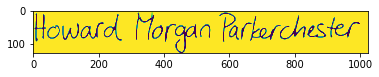

In [10]:
from data import preproc as pp
from cv2 import imshow as cv2_imshow
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, dtgen.dataset['test']['gt']):
        lg.write("TE_L {}\nTE_P {}\n".format(gt, pd))
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
    print("=" * 100, "\n")
    plt.imshow(pp.adjust_to_see(item))
    print(dtgen.dataset['test']['gt'][i])
    print(predicts[i], "\n")

## 7 Evaluate

Evaluation process is more manual process. Here we have the `ocr_metrics`, but feel free to implement other metrics instead. In the function, we have three parameters: 

* predicts
* ground_truth
* norm_accentuation (calculation with/without accentuation)
* norm_punctuation (calculation with/without punctuation marks)

In [11]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts=predicts,
                                  ground_truth=dtgen.dataset['test']['gt'],
                                  norm_accentuation=False,
                                  norm_punctuation=False)

e_corpus = "\n".join([
    "Total test images:    {}".format(dtgen.size['test']),
    "Total time:           {}".format(total_time),
    "Time per item:        {}\n".format(total_time / dtgen.size['test']),
    "Metrics:",
    "Character Error Rate: {}".format(evaluate[0]),
    "Word Error Rate:      {}".format(evaluate[1]),
    "Sequence Error Rate:  {}".format(evaluate[2])
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)

Total test images:    3048
Total time:           0:01:54.852684
Time per item:        0:00:00.037681

Metrics:
Character Error Rate: 0.047492691046496234
Word Error Rate:      0.21719355393075868
Sequence Error Rate:  0.5442913385826772


In [12]:
from data import preproc as pp

In [13]:
test_img = '../0_BusinessName_196_331.png'
pp_img = pp.normalization(pp.preproc(test_img, input_size ).reshape(1024,128,1))

In [14]:
from matplotlib.pyplot import imshow

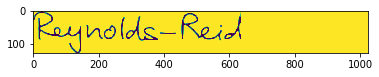

In [15]:
imshow(pp.adjust_to_see(pp.preproc(test_img, input_size )))

In [16]:
predicts, _= model.predict(x=pp_img.reshape(1,1024,128,1),
                            steps=1,
                            ctc_decode=True,
                            verbose=1)
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
predicts

Model Predict
1/1 [==============================] - 2s 2s/sample
CTC Decode
1/1 [==============================] - 0s 27ms/step


['Reynolds - Reid']

In [18]:
# saving model for serving
model.model.save('../htr_saved_model_v1/htr_saved_model_v1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../htr_saved_model_v1/htr_saved_model_v1/assets
